In [ ]:
## Import dependencies
# Standard libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from Bio import SeqIO

# PyTorch libraries
import torch
import torch.nn.functional as F

# ESM3 and ESMC libraries
import esm
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig
from esm.models.esmc import LogitsConfig

In [2]:
# Load sklearn libraries for PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

N_KMEANS_CLUSTERS = 3

In [3]:
## Load ESM-C models from forge
from getpass import getpass
token = getpass("Token from Forge console: ")

from esm.sdk import client
model = client(
    model="esmc-6b-2024-12", 
    url="https://forge.evolutionaryscale.ai", 
    token=token
) 

In [ ]:
# Load the ESM-C embeddings
embeddings_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/antiphage_sequences_embeddings.pt"
embeddings_orf_path = "/home/azureuser/cloudfiles/code/Users/jc62/projects/direct_sequence_analysis/data/orf1_and_2_sections_embeddings.pt"
embeddings = torch.load(embeddings_path)
embeddings_orf = torch.load(embeddings_orf_path)

In [ ]:
# Calculate distances
cos_distance_batch_df = pd.DataFrame(cos_distance_batch.to(torch.float32).numpy(), columns=["cosine_distance"])
cos_distance_batch_df["index"] = cos_distance_batch_df.index + 1  # Adjust

In [ ]:
top5 = cos_distance_batch_df['cosine_distance'].sort_values(ascending=False).head(5)
print(f"target index: {165}")
print(top5)

target index: 165
164    0.996094
148    0.898438
146    0.898438
162    0.898438
193    0.890625
Name: cosine_distance, dtype: float32


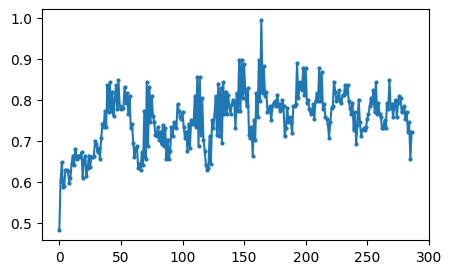

In [144]:
cos_distance_batch_float32 = cos_distance_batch.to(torch.float32)
plt.figure(figsize=(5, 3))
plt.plot(cos_distance_batch_float32.numpy(), marker='o', linestyle='-', markersize=2)